# Heart Disease Analysis and Probability Prediction

### Reading, Loading and Storing in a Dataframe

Data Source:  UC Irvine Machine Learning Data Archive
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ 

In [1]:
'''

Steps for reproducing results in this notebook:

1) Make data/ directory in the working directory

2) Run the following commands in the order:

$ curl -o data/cleveland14.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

$ curl -o data/hungarian14r.ssv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data

$ curl -o data/switzerland14.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data

$ curl -o data/long_beach_va14.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data

$ python convert_ssv_to_csv.py data/hungarian14r

$ python join_files.py

3) The output of join_files.py is file data/heart_disease_all14.csv and is ready for processing by Heart_Disease_Analysis_Complete.ipynb

'''

'\n\nSteps for reproducing results in this notebook:\n\n1) Make data/ directory in the working directory\n\n2) Run the following commands in the order:\n\n$ curl -o data/cleveland14.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data\n\n$ curl -o data/hungarian14r.ssv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data\n\n$ curl -o data/switzerland14.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data\n\n$ curl -o data/long_beach_va14.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data\n\n$ python convert_ssv_to_csv.py data/hungarian14r\n\n$ python join_files.py\n\n3) The output of join_files.py is file data/heart_disease_all14.csv and is ready for processing by Heart_Disease_Analysis_Complete.ipynb\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''
List of available features:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
    
The actual number of feature variables (after converting categorical variables
to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

The response variable (num) is categorical with 5 values, but we don't have
enough data to predict all the categories. Therefore we'll replace num with:
14. hd (heart disease): categorical, 2 values {0: no, 1: yes}
'''

"\nList of available features:\n\n 1. age: continuous\n 2. sex: categorical, 2 values {0: female, 1: male}\n 3. cp (chest pain type): categorical, 4 values\n    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}\n 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)\n 5. chol (serum cholesterol level): continuous (mg/dl)\n 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}\n 7. restecg (resting electrocardiography): categorical, 3 values\n    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}\n 8. thalach (maximum heart rate achieved): continuous\n 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}\n10. oldpeak (ST depression induced by exercise relative to rest): continuous\n11. slope (slope of peak exercise ST segment): categorical, 3 values \n    {1: upsloping, 2: flat, 3: downsloping}\n12. ca (number of major vessels colored by fluoroscopy): discrete (

In [4]:
#Reading the data fron CSV file using pandas and creating Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0 = pd.read_table("data/heart_disease_all14.csv", sep=',', header=None, names=columns)

In [5]:
#Viewing first few rows of dataset
df0.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [6]:
#Computing mean,count,etc. characteristics
df0.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#Checking the number of rows and columns in the dataset
df0.shape

(299, 14)

### Generating histograms for viewing distribution of values

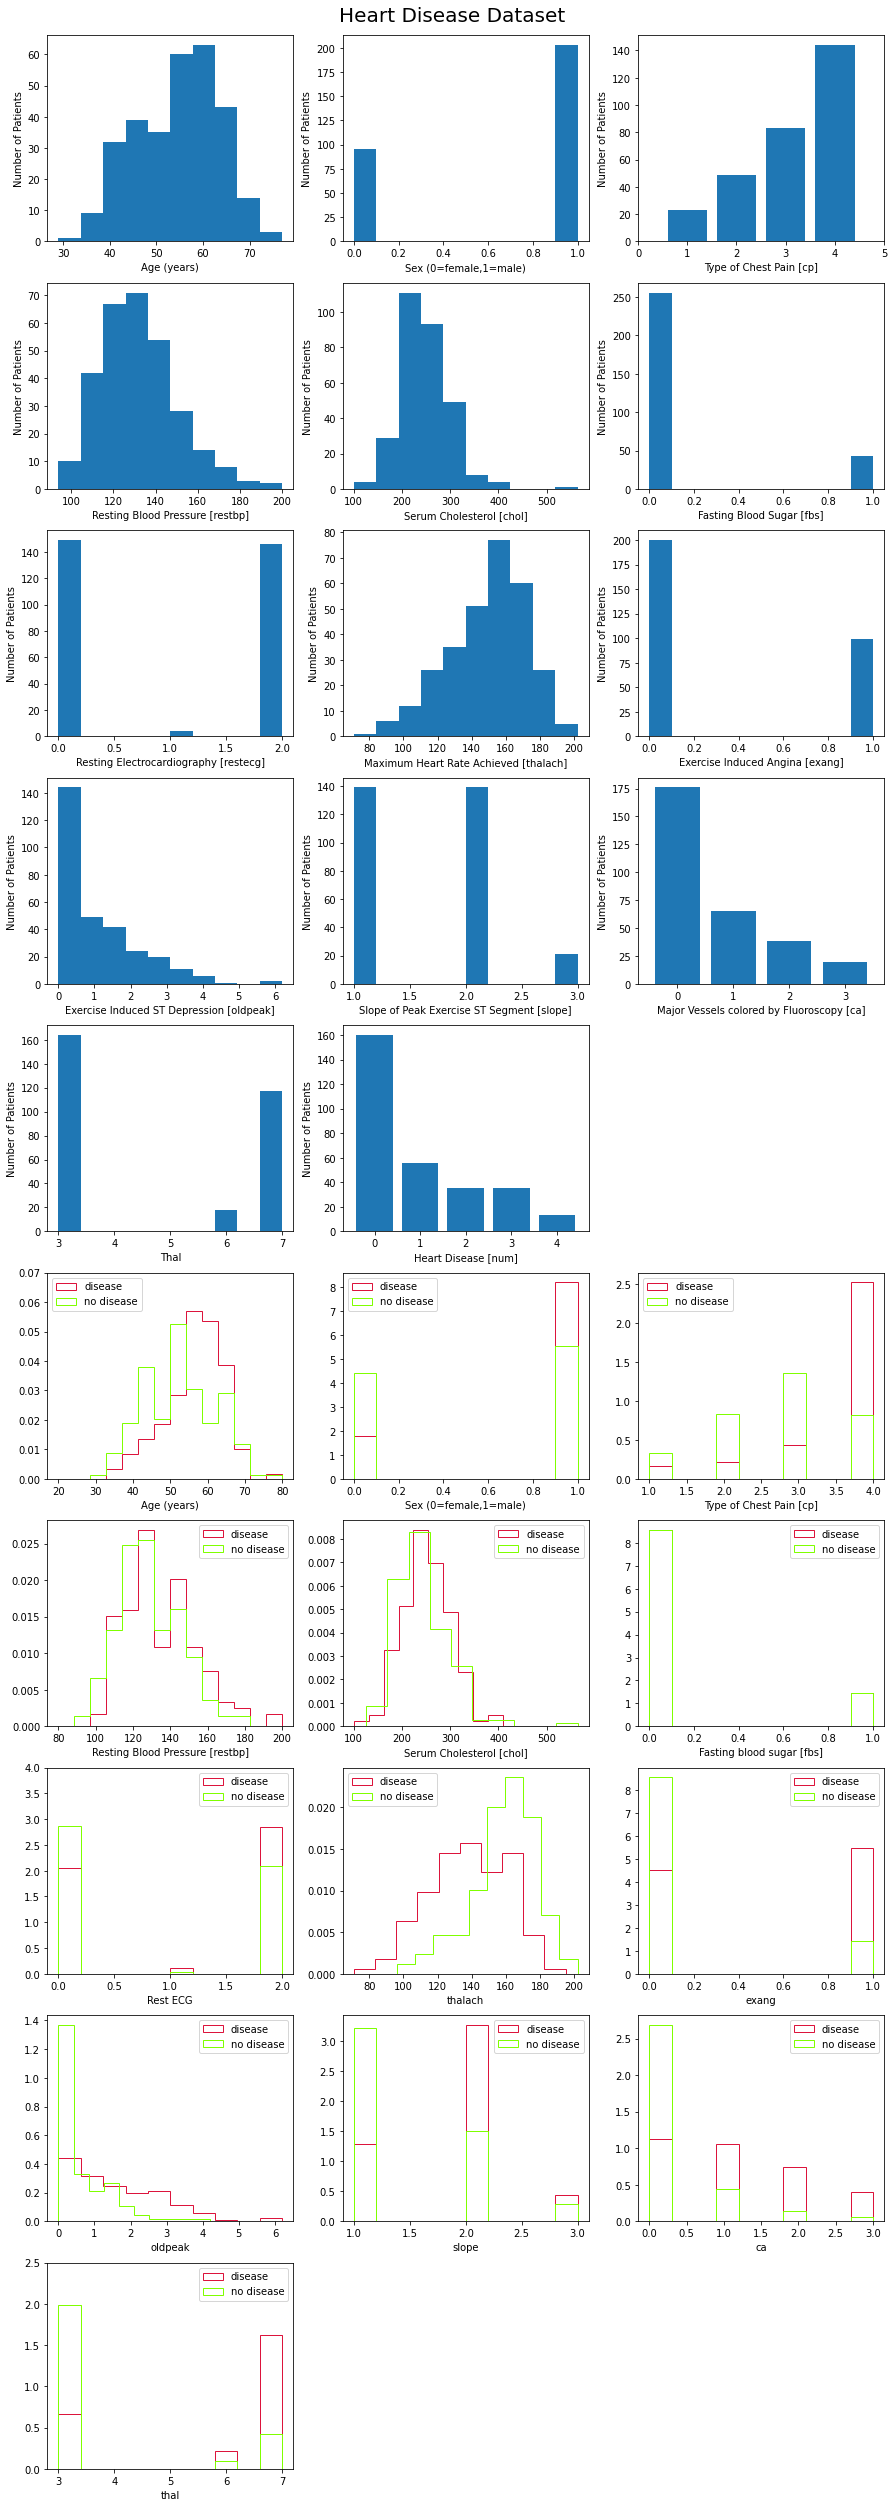

In [8]:

fig, axes = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Dataset", fontsize=20)
axes[0,0].hist(df0.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df0.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df0.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df0.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df0.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df0.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df0.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df0.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df0.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df0.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df0.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df0.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df0.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df0.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel("Heart Disease [num]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")

#Marginal Feature Distribution comapared for disease and not-disease
bins = np.linspace(20, 80, 15)
axes[5,0].hist(df0[df0.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",density=True)
axes[5,0].hist(df0[df0.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[5,0].set_xlabel("Age (years)")
axes[5,0].set_ylim(0.0,0.070)
axes[5,0].legend(prop={'size': 10},loc="upper left")
axes[5,1].hist(df0[df0.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[5,1].hist(df0[df0.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[5,1].set_xlabel("Sex (0=female,1=male)")
axes[5,1].legend(prop={'size': 10},loc="upper left")
axes[5,2].hist(df0[df0.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[5,2].hist(df0[df0.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[5,2].set_xlabel("Type of Chest Pain [cp]")
axes[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[6,0].hist(df0[df0.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",density=True)
axes[6,0].hist(df0[df0.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[6,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[6,0].legend(prop={'size': 10},loc="upper right")
axes[6,1].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[6,1].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[6,1].set_xlabel("Serum Cholesterol [chol]")
axes[6,1].legend(prop={'size': 10},loc="upper right")
axes[6,2].hist(df0[df0.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[6,2].hist(df0[df0.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[6,2].set_xlabel("Fasting blood sugar [fbs]")
axes[6,2].legend(prop={'size': 10},loc="upper right")
axes[7,0].hist(df0[df0.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[7,0].hist(df0[df0.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[7,0].set_xlabel("Rest ECG")
axes[7,0].set_ylim(0.0,4.0)
axes[7,0].legend(prop={'size': 10},loc="upper right")
axes[7,1].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[7,1].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[7,1].set_xlabel("thalach")
axes[7,1].legend(prop={'size': 10},loc="upper left")
axes[7,2].hist(df0[df0.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[7,2].hist(df0[df0.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[7,2].set_xlabel("exang")
axes[7,2].legend(prop={'size': 10},loc="upper right")
axes[8,0].hist(df0[df0.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[8,0].hist(df0[df0.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[8,0].set_xlabel("oldpeak")
axes[8,0].legend(prop={'size': 10},loc="upper right")
axes[8,1].hist(df0[df0.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[8,1].hist(df0[df0.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[8,1].set_xlabel("slope")
axes[8,1].legend(prop={'size': 10},loc="upper right")
axes[8,2].hist(df0[df0.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[8,2].hist(df0[df0.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[8,2].set_xlabel("ca")
axes[8,2].legend(prop={'size': 10},loc="upper right")
axes[9,0].hist(df0[df0.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[9,0].hist(df0[df0.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[9,0].set_xlabel("thal")
axes[9,0].set_ylim(0.0,2.5)
axes[9,0].legend(prop={'size': 10},loc="upper right")

axes[9,1].axis("off")
axes[9,2].axis("off")

plt.show()

In [9]:
#Converting categorial values into discrete values
#Note that feature ca is discrete but not categorical, so we don't convert it.
df = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

#Replace response variable values and renaming it hd
#The num variable values of 1,2,3,4 are replaced with 1 in order to signify that the patient has heart disease
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df = df.rename(columns = {"num":"hd"})

new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print ('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index)))
print (df.head())
print (df.describe())

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["hd"]
Xall = stddf[new_columns_2[1:]].values


Number of patients in dataframe: 299, with disease: 139, without disease: 160

    age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca   hd  cp_1  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0  0.0     1   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0  1.0     0   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0  1.0     0   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0  0.0     0   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0  0.0     0   

   cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0     0     0       0       1        0        1       1       0  
1     0     0       0       1        0        0       0       0  
2     0     0       0       1        0        0       0       1  
3     0     1       0       0        0        1       0       0  
4     1     0       0       1        1        0       0       0  
              age        sex      restbp        chol         

In [10]:
'''
Note about logistic regression with scikit-learn:
-> In scikit-learn we can specify penalty="l1" or penalty="l2", with
  an associated C=c, which is the *inverse* of the regularization strength.
  Thus, for zero regularization specify a high value of c.  Scikit-learn
  does not calculate uncertainties on the fit coefficients.
'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lasso = False

nfeatures = len(stddf.columns)
if lasso:           # lasso regularization
    penalty = "l1"
    cval    = 1.0
    alpha   = [1.0]*nfeatures
else:               # no regularization
    penalty = "l1"
    cval    = 1000.0
    alpha   = 0.0

model = LogisticRegression(fit_intercept=True,penalty=penalty,dual=False,C=cval,solver='liblinear')
print(model)
lrfit = model.fit(Xall,yall)
print('\nLogisticRegression score on full data set: %f\n' % lrfit.score(Xall,yall))
ypred = model.predict(Xall)
print ('\nClassification report on full data set:')
print(metrics.classification_report(yall,ypred))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(yall,ypred))
print ('\nLogisticRegression coefficients:')
coeff = model.coef_.tolist()[0]
for index in range(len(coeff)):
    print ('%s : %8.5f' % (new_columns_2[index+1].rjust(9),coeff[index]))
print( 'Intercept : %f' %model.intercept_)

LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')

LogisticRegression score on full data set: 0.872910


Classification report on full data set:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       160
         1.0       0.89      0.83      0.86       139

    accuracy                           0.87       299
   macro avg       0.88      0.87      0.87       299
weighted avg       0.87      0.87      0.87       299


Confusion matrix:
[[146  14]
 [ 24 115]]

LogisticRegression coefficients:
      age : -0.12375
      sex :  1.54833
   restbp :  0.43321
     chol :  0.22069
      fbs : -0.59454
  thalach : -0.41722
    exang :  0.71817
  oldpeak :  0.41977
       ca :  3.92883
     cp_1 : -2.10069
     cp_2 : -0.84585
     cp_3 : -1.85014
   recg_1 :  0.77476
   recg_2 :  0.46866
  slope_1 : -1.16422
  slope_3 : -0.64710
   thal_6 : -0.03106
   thal_7 :  1.40131
Intercept : -0.605188
